In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

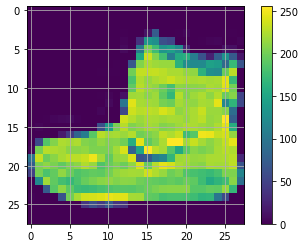

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

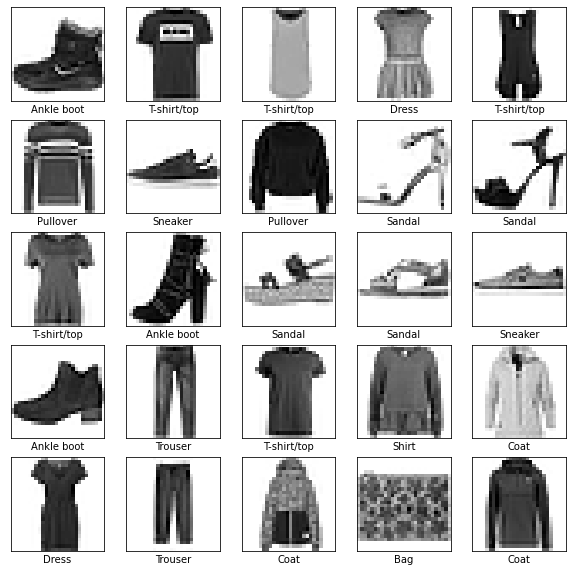

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
#construct the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
#compile the model
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics=['accuracy'])
#train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 482us/step - loss: 8.9994 - accuracy: 0.6594
Epoch 2/10
1875/1875 [==============================] - 1s 482us/step - loss: 0.7025 - accuracy: 0.7284
Epoch 3/10
1875/1875 [==============================] - 1s 495us/step - loss: 0.6210 - accuracy: 0.7632
Epoch 4/10
1875/1875 [==============================] - 1s 487us/step - loss: 0.5858 - accuracy: 0.7758
Epoch 5/10
1875/1875 [==============================] - 1s 515us/step - loss: 0.5574 - accuracy: 0.7849
Epoch 6/10
1875/1875 [==============================] - 1s 510us/step - loss: 0.5074 - accuracy: 0.8220
Epoch 7/10
1875/1875 [==============================] - 1s 519us/step - loss: 0.4922 - accuracy: 0.8320
Epoch 8/10
1875/1875 [==============================] - 1s 510us/step - loss: 0.4835 - accuracy: 0.8340
Epoch 9/10
1875/1875 [==============================] - 1s 509us/step - loss: 0.4633 - accuracy: 0.8413
Epoch 10/10
1875/1875 [==============================] - 1s 518u

In [10]:
#evaluate the accuracy on test model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5391 - accuracy: 0.8257

Test accuracy: 0.8256999850273132


In [14]:
#image prediction, you can add a softmax model to convert the
probability_model = keras.Sequential([model,
                                        tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([0.0000000e+00, 2.1689698e-28, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 4.8997160e-04, 0.0000000e+00, 2.3847418e-03,
       4.2807720e-15, 9.9712533e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap= plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
               color= color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

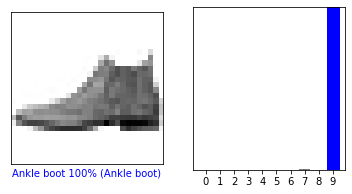

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

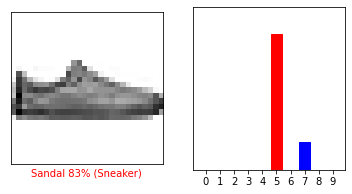

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

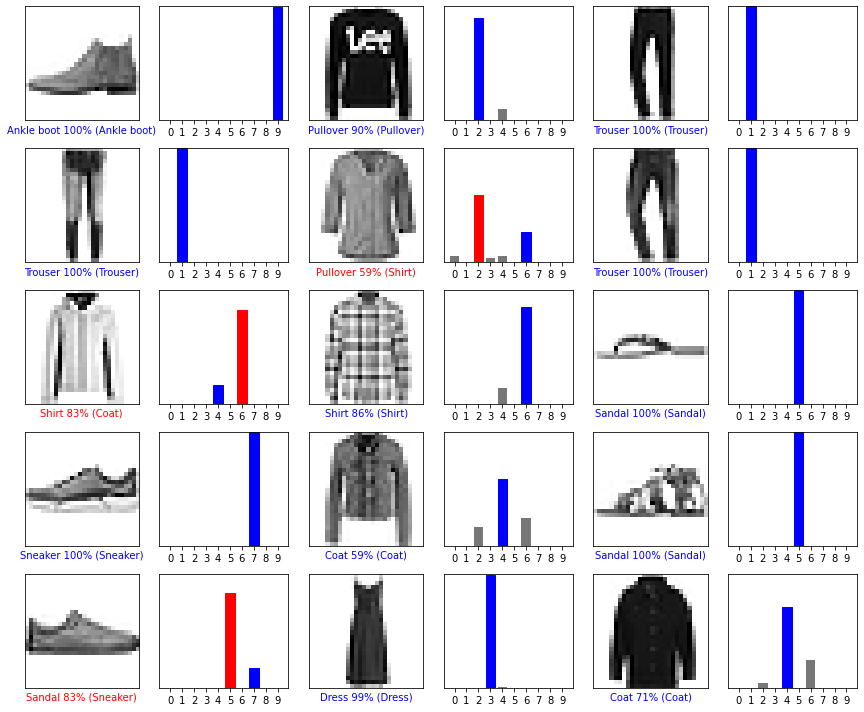

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)


[[3.3649744e-04 8.8739262e-06 8.9703697e-01 8.9838653e-04 9.6083537e-02
  2.7035866e-22 5.6357477e-03 0.0000000e+00 8.7442862e-13 2.5103992e-27]]


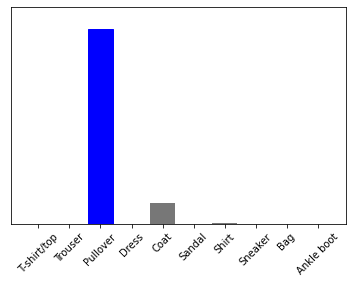

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

2